# (26) Combine fits

**Motivation**: ...across different sim categories <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Copy fits to tmp dir

In [2]:
fits = [
    'fixate1_nf-2752_(2023_04_25,19:34)',
    'transl2_nf-2752_(2023_04_25,18:38)',
    'ApplyMaskNot_fixate4_nf-2752_(2023_04_24,21:08)',
]
copy_fits(fits, tmp_dir)

## Load & analyze

In [3]:
perf = {}
for fit_name in fits:
    df = f"summary_{fit_name}.df"
    df = pjoin(tmp_dir, df)
    df = pd.read_pickle(df)
    perf[fit_name] = df.perf.values

In [4]:
list(perf)

['fixate1_nf-2752_(2023_04_25,19:34)',
 'transl2_nf-2752_(2023_04_25,18:38)',
 'ApplyMaskNot_fixate4_nf-2752_(2023_04_24,21:08)']

In [5]:
sorted_data = sorted(
    zip(perf[fits[0]], perf[fits[1]], perf[fits[2]]),
    key=lambda x: x[0]
)
a, b, c = zip(*sorted_data)

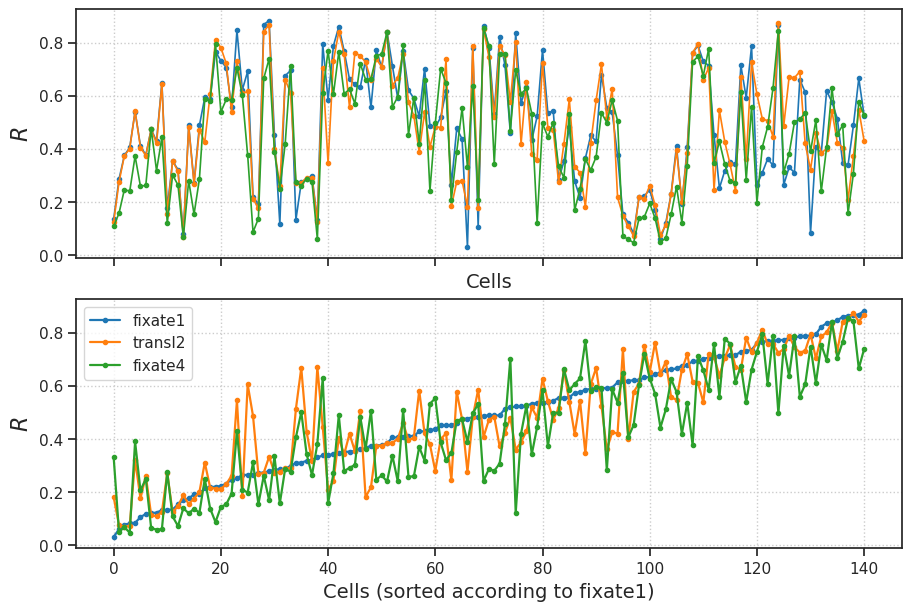

In [6]:
fig, axes = create_figure(2, 1, (9, 6), 'all', layout='constrained')

axes[0].plot(perf[fits[0]], marker='.', lw=1.2, label='fixate1')
axes[0].plot(perf[fits[1]], marker='.', lw=1.2, label='transl2')
axes[0].plot(perf[fits[2]], marker='.', lw=1.2, label='fixate4')
axes[0].set_xlabel('Cells', fontsize=14)

axes[1].plot(a, marker='.', lw=1.6, label='fixate1')
axes[1].plot(b, marker='.', lw=1.6, label='transl2')
axes[1].plot(c, marker='.', lw=1.6, label='fixate4')
axes[1].set_xlabel('Cells (sorted according to fixate1)', fontsize=14)
axes[1].legend()

for ax in axes.flat:
    ax.set_ylabel(r'$R$', fontsize=16)
    ax.grid()

plt.show()

In [34]:
x = np.stack([v for v in perf.values()])
counts = collections.Counter(np.argmax(x, axis=0))
counts = {
    list(perf)[i]: c for
    i, c in counts.items()
}
percent = {
    k: np.round(100 * v / sum(counts.values()), 1)
    for k, v in counts.items()
}
print(percent)

{
    'fixate1_nf-2752_(2023_04_25,19:34)': 53.2,
    'transl2_nf-2752_(2023_04_25,18:38)': 27.0,
    'ApplyMaskNot_fixate4_nf-2752_(2023_04_24,21:08)': 19.9
}

In [35]:
best = x.max(0)
x = best.mean()
x

0.5283099799529591

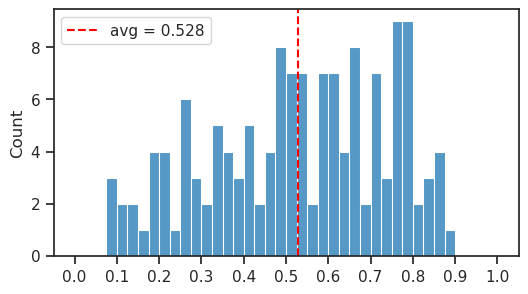

In [36]:
fig, ax = create_figure(1, 1, (6, 3.2))
sns.histplot(best, bins=np.linspace(0, 1, 41), ax=ax)
ax.axvline(x, color='r', ls='--', label=f"avg = {x:0.3f}")
ax.locator_params(axis='x', nbins=11)
ax.legend()
plt.show()